In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import random

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

Aprèn a realitzar mostreig de les dades amb Python.  
Objectius:  
-Preprocesar  
-Mostrejar  
### Nivell 1
#### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades  
generant una mostra aleatòria simple i una mostra sistemàtica.

In [4]:
df = pd.read_csv(r'MLB.txt', delimiter = "\t")

In [3]:
df.head(5)

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [4]:
df.shape

(828, 4)

In [5]:
df.columns

Index(['player', 'team', 'position', 'salary'], dtype='object')

In [6]:
# Mostra Aleàtoria Simple (SRS). Agafem una mostra de 10 mostres aleàtories:

srs_df = df.sample(10)

In [7]:
srs_df

,player,team,position,salary
726,Willy Aybar,Tampa Bay Rays,First Baseman,1350.00
756,Darren O'Day,Texas Rangers,Pitcher,426.70
388,Vicente Padilla,Los Angeles Dodgers,Pitcher,5025.00
486,Henry Blanco,New York Mets,Catcher,750.00
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.00
493,Ruben Tejada,New York Mets,Shortstop,400.00
575,Antonio Bastardo,Philadelphia Phillies,Pitcher,405.00
418,Rickie Weeks,Milwaukee Brewers,Second Baseman,2750.00
271,Nate Robertson,Florida Marlins,Pitcher,10000.00
515,Alfredo Aceves,New York Yankees,Pitcher,435.65


In [8]:
# Mostra sistemàtica. Comencem des del primer registre (df.index=0) tal com venien les dades per defecte,
# i anem agafant una mostra cada 5 (5th).
sys_sample_df = df.iloc[::5]
sys_sample_df

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0
10,Aaron Heilman,Arizona Diamondbacks,Pitcher,2150.0
15,Blaine Boyer,Arizona Diamondbacks,Pitcher,725.0
20,Tony Abreu,Arizona Diamondbacks,Shortstop,407.0
...,...,...,...,...
805,Chien-Ming Wang,Washington Nationals,Pitcher,2000.0
810,Sean Burnett,Washington Nationals,Pitcher,775.0
815,Tyler Walker,Washington Nationals,Pitcher,650.0
820,Mike Morse,Washington Nationals,First Baseman,410.0


### Nivell 2
#### Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada  
i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

In [9]:
# Mostra estratificada. Volem agafar una mostra de les dades estratificant-les segons les posicions de joc dels jugadors:

In [10]:
df['position'].unique()

array(['Pitcher', 'Catcher', 'First Baseman', 'Outfielder', 'Shortstop',
       'Second Baseman', 'Third Baseman', 'Designated Hitter',
       'Infielder'], dtype=object)

In [11]:
len(df['position'].unique())

9

In [12]:
# Agrup segons la posició
pos_grp = df.groupby(['position'], group_keys= True)

In [13]:
# Dividim el df segons la posició, agafant una mostra del 20%:

stratified_sample = pos_grp.apply(pd.DataFrame.sample, frac=.2)

In [14]:
stratified_sample

player                  team       position  \
position                                                                    
Catcher       379      Robert Wilson   Los Angeles Angeles        Catcher   
              683         Adam Moore      Seattle Mariners        Catcher   
              315  Humberto Quintero        Houston Astros        Catcher   
              679     Rob J. Johnson      Seattle Mariners        Catcher   
              166    Ramon Hernandez       Cincinnati Reds        Catcher   
...                              ...                   ...            ...   
Third Baseman 24          Rusty Ryal  Arizona Diamondbacks  Third Baseman   
              592       Andy LaRoche    Pittsburgh Pirates  Third Baseman   
              430      Casey McGehee     Milwaukee Brewers  Third Baseman   
              13       Mark Reynolds  Arizona Diamondbacks  Third Baseman   
              110     Aramis Ramirez          Chicago Cubs  Third Baseman   

                      salary  
position                      
Catcher       379    402.000  
              683    401.000  
              315    750.000  
              679    412.500  
              166   3868.376  
...                      ...  
Third Baseman 24     401.000  
              592    451.000  
              430    427.500  
              13     833.333  
              110  16750.000  

[165 rows x 4 columns]

In [15]:
# Abans d'extreure la mostra mirem quin % de jugadors hi ha de cada posició
df['position'].value_counts(normalize=True)

Pitcher              0.495169
Outfielder           0.178744
Catcher              0.080918
Shortstop            0.067633
Second Baseman       0.057971
Third Baseman        0.055556
First Baseman        0.050725
Designated Hitter    0.008454
Infielder            0.004831
Name: position, dtype: float64

In [16]:
# Ara fem una mostra stratificada aplicant el mètode training-test de sklearn:
df_train, df_test = train_test_split(df, test_size = 0.2, stratify=df['position'])

In [17]:
# Si ho hem fet bé la mostra hauria de contenir un % de jugadors amb la seva posició,
# igual o molt semblant al del total de les dades.

df_train['position'].value_counts(normalize=True)

Pitcher              0.495468
Outfielder           0.178248
Catcher              0.080060
Shortstop            0.067976
Second Baseman       0.057402
Third Baseman        0.055891
First Baseman        0.051360
Designated Hitter    0.009063
Infielder            0.004532
Name: position, dtype: float64

In [18]:
# Tan en el train com en el test:
df_test['position'].value_counts(normalize=True)

Pitcher              0.493976
Outfielder           0.180723
Catcher              0.084337
Shortstop            0.066265
Second Baseman       0.060241
Third Baseman        0.054217
First Baseman        0.048193
Infielder            0.006024
Designated Hitter    0.006024
Name: position, dtype: float64

SMOTE

Agafem només dues classes, les majoritàries, que de totes maneres no estan balancejades:

In [17]:
pitcher = df[df['position']=='Pitcher']

In [18]:
outfielder= df[df['position']=='Outfielder']

In [20]:
df_1 = pd.concat([pitcher, outfielder])

In [21]:
df_1

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0
10,Aaron Heilman,Arizona Diamondbacks,Pitcher,2150.0
...,...,...,...,...
793,Travis Snider,Toronto Blue Jays,Outfielder,405.8
802,Josh Willingham,Washington Nationals,Outfielder,4600.0
807,Willie Harris,Washington Nationals,Outfielder,1500.0
817,Nyjer Morgan,Washington Nationals,Outfielder,426.5


In [23]:
df_1['position'].value_counts(normalize=True)

Pitcher       0.734767
Outfielder    0.265233
Name: position, dtype: float64

La classe Pitcher té un 73'5% dels valors totals i Outfielder un 26,5%. Passem les dades a binari:

In [24]:
encoder = LabelEncoder()
df_1['position'] = encoder.fit_transform(df_1['position'])

In [33]:
df_1

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,1,8500.0
1,Danny Haren,Arizona Diamondbacks,1,8250.0
3,Edwin Jackson,Arizona Diamondbacks,1,4600.0
5,Chad Qualls,Arizona Diamondbacks,1,4185.0
10,Aaron Heilman,Arizona Diamondbacks,1,2150.0
...,...,...,...,...
793,Travis Snider,Toronto Blue Jays,0,405.8
802,Josh Willingham,Washington Nationals,0,4600.0
807,Willie Harris,Washington Nationals,0,1500.0
817,Nyjer Morgan,Washington Nationals,0,426.5


In [34]:
df_1.drop('player', axis = 1, inplace=True)

In [35]:
encoder = LabelEncoder()
df_1['team'] = encoder.fit_transform(df_1['team'])

Train Test Split

In [51]:
X = (df_1.drop(['position'], 1))
y = (df_1['position'])
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
counter = y_train.value_counts()
print("Abans de l'SMOTE: ", counter)

Abans de l'SMOTE:  1    327
0    119
Name: position, dtype: int64


In [53]:
sm = SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

counter = y_train_sm.value_counts()
print("Després de l'SMOTE: ", counter)

Després de l'SMOTE:  0    327
1    327
Name: position, dtype: int64


Text(0, 0.5, 'Number of players')

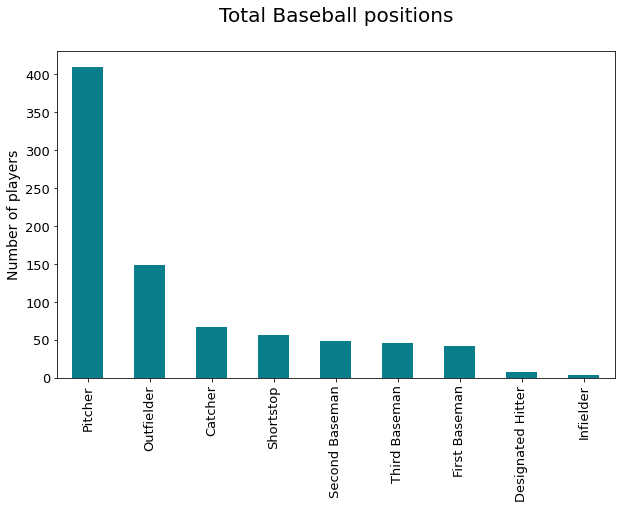

In [54]:
ax = df['position'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Total Baseball positions', size=20, pad=30)
ax.set_ylabel('Number of players', fontsize=14)


Text(0, 0.5, 'Number of players')

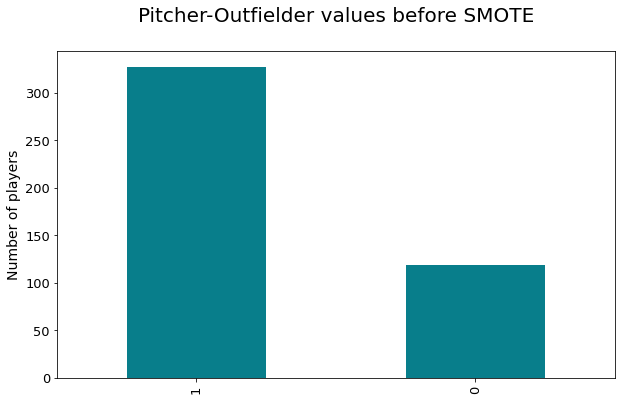

In [55]:
ax = y_train.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Pitcher-Outfielder values before SMOTE', size=20, pad=30)
ax.set_ylabel('Number of players', fontsize=14)

Text(0, 0.5, 'Number of players')

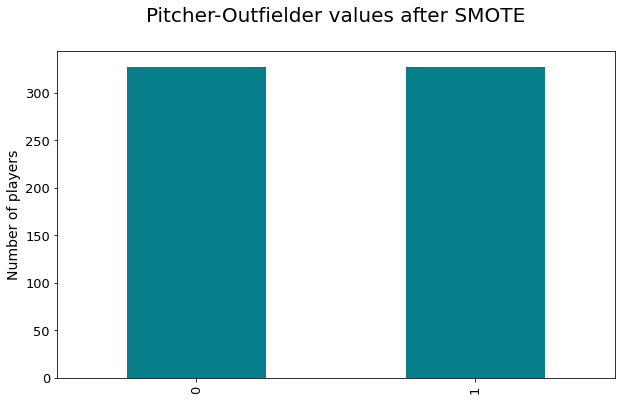

In [57]:
ax = y_train_sm.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Pitcher-Outfielder values after SMOTE', size=20, pad=30)
ax.set_ylabel('Number of players', fontsize=14)

### Nivell 3
#### Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [61]:
# Creem una funció pel mètode de mostreig 'Reservoir'.


def reservoir_sampling(column, n_samples):
    reservoir = []
    k = n_samples

    for i, element in enumerate(column):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element
                    
    return(print(reservoir))


In [63]:
# Agafem una mostra de k = 20 observacions de la variable 'salary' :               

reservoir_sampling(df['salary'], 20)

[8333.333, 2250.0, 402.0, 440.0, 1500.0, 15000.0, 426.5, 3000.0, 470.0, 415.0, 12500.0, 3650.0, 15433.333, 775.0, 402.0, 1750.0, 422.0, 11500.0, 440.0, 427.4]
